# Question 2

For a given flow, the velocity from time $t=0$ to $t=10\;s$ was $u=2\;m/s$, $v=0$. 

Then, from time $t=10\;s$ to $t=15\;s$, the velocity was $u=3\;m/s$, $v=-4\;m/s$.

A dye streak was started at a point in the flow field at time $t=0$, and the path of a particle in the fluid was also traced from that same point starting at the same time. 

Plot the <font color=blue>**streamline**</font>, <font color=green>**pathline**</font> of the particle, and <font color=red>**streakline**</font> at time $t=15\;s$.

In [13]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Given Flow
You can edit these vectors to change the flow, or the point of interest.

The format is as follows:  
$\texttt{u}_{\texttt{given}}[\texttt{i}], \texttt{v}_{\texttt{given}}[\texttt{i}]\rightarrow 
\begin{cases}
    \texttt{t} \geq \texttt{t}_{\texttt{given}}[\texttt{i}]\\
    \texttt{t}<\texttt{t}_{\texttt{given}}[\texttt{i+1}]
\end{cases}$

In [14]:
t_given = np.array([0.,10.,15.]) # [s]
u_given = np.array([2.,3.]) # [m/s]
v_given = np.array([0.,-4.]) # [m/s]

# Initial Position
x_o = 0.0; y_o = 0.0

In [15]:
del_t = .5 #[s] # timestep for plotting/animation
t = np.arange(t_given[0],t_given[-1]+del_t,del_t) # create time vector

# create vectors for velocities changing in time
u_t = np.zeros(t.size); v_t = np.zeros(t.size) 

for i in range(0,t_given.size-1):
    for j in np.where([(t >= t_given[i]) & (t<t_given[i+1])])[1]:
            u_t[j] = u_given[i]
            v_t[j] = v_given[i]

# fill in final value
u_t[-1] = u_given[-1]; v_t[-1] = v_given[-1]

## Figure settings
Preferences for visualization

In [16]:
fig_dpi = 100 # printed size of figure
buffer = 10 # extend axes

line_w = 2 # linewidth
marker_sm = 5; marker_lg = 10 # markersizes

# velocity field
vel_c = '.5'; vel_s = 30 # color & scale
vel_n = 10 # grid size

inter = del_t*1000 # [ms] delay between animation frames

l_e = 'w' # legend edge color

# <font color=blue>Streamline</font>
<font color=blue>Instantaneously tangent to the velocity</font>

In [17]:
x_stream = np.zeros(t.size); y_stream = np.zeros(t.size) # create streamline vector

for i in range(0,t.size):
    x_stream[i] = x_o + u_t[i]*del_t # [m] # position always relative to initial position
    y_stream[i] = y_o + v_t[i]*del_t # [m]
    
# streamline min/max (over all time steps) for figure
stream_axis = np.zeros(4,)
stream_axis[0] = np.amin(x_stream)-buffer; stream_axis[1] = np.amax(x_stream)+buffer
stream_axis[2] = np.amin(y_stream)-buffer; stream_axis[3] = np.amax(y_stream)+buffer

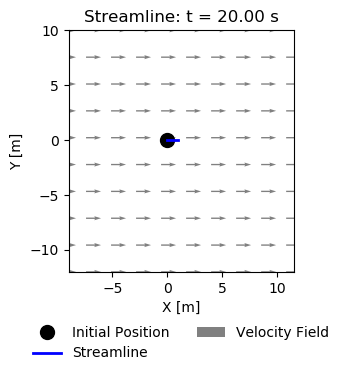

In [18]:
fig = plt.figure(dpi=fig_dpi) 

# set axis
ax = plt.axes(xlim=(stream_axis[0], stream_axis[1]),
              ylim=(stream_axis[2], stream_axis[3]),
              xlabel=('X [m]'), ylabel=('Y [m]'), aspect=('equal')) 

# create velocity field grid
x_vals = np.linspace(stream_axis[0], stream_axis[1], vel_n)
y_vals = np.linspace(stream_axis[2], stream_axis[3], vel_n)
X,Y= np.meshgrid(x_vals, y_vals, sparse=False, indexing='xy')

# initial position
plt.plot(x_o, y_o, color='black', linestyle='None',marker='o', markersize=marker_lg, 
         label='Initial Position')
# streamline 
line_stream, = ax.plot([], [], color='blue', linewidth=line_w,
                       label='Streamline') 
# velocity field
vel_field = ax.quiver(X, Y, np.empty(X.size), np.empty(X.size), color=vel_c, scale=vel_s, pivot='mid', 
                      label='Velocity Field')
# legend outside of plot
box = ax.get_position()
ax.set_position([box.x0+box.width*0.2/2, box.y0+box.height*0.2, box.width*0.8, box.height*0.8])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.17), ncol=2, edgecolor=l_e)

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line_stream.set_data([], []) 
    vel_field.set_UVC(np.empty(X.size), np.empty(X.size))
    return line_stream, vel_field

# animation function 
def animate(k): 
    # streamline
    line_stream.set_data([x_o, x_stream[k]], [y_o, y_stream[k]]) 
    # velocity field
    U = np.multiply(u_t[k],np.ones(X.size))
    V = np.multiply(v_t[k],np.ones(X.size))
    vel_field.set_UVC(U,V)
    # title
    ax.set_title('Streamline: t = {:.2f} s'.format(t[k]))
    return line_stream, vel_field

# call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=t.size, interval=inter, blit=True) 
HTML(anim.to_jshtml())

# <font color=green>Pathline</font>
<font color=green>Trajectory of fluid particle</font>

In [19]:
x_path = np.zeros(t.size); y_path = np.zeros(t.size) # create pathline vector

# initial position of particle
x_path[0]=x_o; y_path[0]=y_o

for i in range(1,t.size):
    x_path[i] = x_path[i-1] + u_t[i-1]*del_t # [m] # particle moving forward in time
    y_path[i] = y_path[i-1] + v_t[i-1]*del_t # [m]
    
# pathline min/max (over all time steps) for figure
path_axis = np.zeros(4,)
path_axis[0] = np.amin(x_path)-buffer; path_axis[1] = np.amax(x_path)+buffer
path_axis[2] = np.amin(y_path)-buffer; path_axis[3] = np.amax(y_path)+buffer

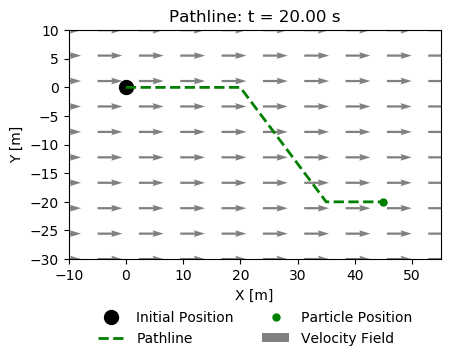

In [20]:
fig = plt.figure(dpi=fig_dpi) 

# set axis
ax = plt.axes(xlim=(path_axis[0], path_axis[1]),
              ylim=(path_axis[2], path_axis[3]),
              xlabel=('X [m]'), ylabel=('Y [m]'), aspect=('equal')) 

# create velocity field grid
x_vals = np.linspace(path_axis[0], path_axis[1], vel_n)
y_vals = np.linspace(path_axis[2], path_axis[3], vel_n)
X,Y= np.meshgrid(x_vals, y_vals, sparse=False, indexing='xy')

# initial position
plt.plot(x_o, y_o, color='black', linestyle='None', marker='o', markersize=marker_lg, 
         label='Initial Position')
# pathline
line_path, = ax.plot([], [], color='green', linestyle='--', linewidth=line_w, 
                     label='Pathline') 
# current position
current_point, = ax.plot([], [], color='green', linestyle='None',marker='o', markersize=marker_sm, 
                         label='Particle Position')
# velocity field
vel_field = ax.quiver(X, Y, np.empty(X.size), np.empty(X.size), color=vel_c, scale=vel_s, pivot='mid',
                      label='Velocity Field')
# legend outside of plot
box = ax.get_position()
ax.set_position([box.x0+box.width*0.2/2, box.y0+box.height*0.2, box.width*0.8, box.height*0.8])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.17), ncol=2, edgecolor=l_e)

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line_path.set_data([], []) 
    current_point.set_data([], [])
    vel_field.set_UVC(np.empty(X.size), np.empty(X.size))
    return line_path, current_point, vel_field

# animation function 
def animate(k): 
    # pathline 
    line_path.set_data(x_path[:k+1], y_path[:k+1]) 
    current_point.set_data(x_path[k],y_path[k])
    # velocity field
    U = np.multiply(u_t[k],np.ones(X.size))
    V = np.multiply(v_t[k],np.ones(X.size))
    vel_field.set_UVC(U,V)
    # title
    ax.set_title('Pathline: t = {:.2f} s'.format(t[k]))
    return line_path, current_point, vel_field

# call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=x_path.size, interval=inter, blit=True) 
HTML(anim.to_jshtml())

# <font color=red>Streakline</font>
<font color=red>Dye injected at fixed point</font>

In [21]:
x_streak = np.multiply(x_o,np.ones(t.size)); y_streak = np.multiply(y_o,np.ones(t.size)) # create streakline vector
# dye is continuously released from same position

streak_axis = np.array([x_o, x_o, y_o, y_o])

for i in range(1,t.size):
    x_streak[:i] = x_streak[:i] + u_t[i-1]*del_t # entire past dye streak moving forward in time
    y_streak[:i] = y_streak[:i] + v_t[i-1]*del_t
    
    # streakline min/max (over all time steps) for figure
    streak_axis[0] = np.amin([np.amin(x_streak), streak_axis[0]])
    streak_axis[1] = np.amax([np.amax(x_streak), streak_axis[1]])
    streak_axis[2] = np.amin([np.amin(y_streak), streak_axis[2]])
    streak_axis[3] = np.amax([np.amax(y_streak), streak_axis[3]])
    
streak_axis[0] = streak_axis[0]-buffer; streak_axis[1] = streak_axis[1]+buffer
streak_axis[2] = streak_axis[2]-buffer; streak_axis[3] = streak_axis[3]+buffer

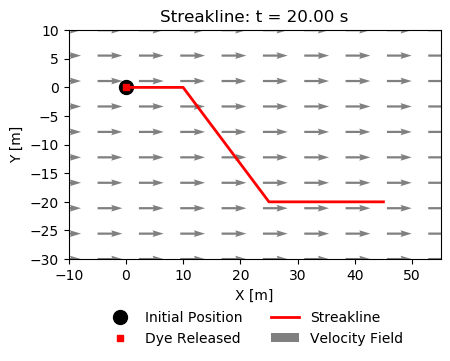

In [22]:
fig = plt.figure(dpi=fig_dpi)

# set axis
ax = plt.axes(xlim=(streak_axis[0], streak_axis[1]),
              ylim=(streak_axis[2], streak_axis[3]),
              xlabel=('X [m]'), ylabel=('Y [m]'), aspect=('equal')) 

# create velocity field grid
x_vals = np.linspace(streak_axis[0], streak_axis[1], vel_n)
y_vals = np.linspace(streak_axis[2], streak_axis[3], vel_n)
X,Y= np.meshgrid(x_vals, y_vals, sparse=False, indexing='xy')

# initial position
plt.plot(x_o, y_o, color='black', linestyle='None',marker='o', markersize=marker_lg, 
         label='Initial Position')
# dye released
plt.plot(x_o, y_o, color='red', linestyle='None',marker='s', markersize=marker_sm, 
         label='Dye Released')
# streakline
line_streak, = ax.plot([], [], color='red', linestyle='-', linewidth=line_w, 
                     label='Streakline') 
# velocity field
vel_field = ax.quiver(X, Y, np.empty(X.size), np.empty(X.size), color=vel_c, scale=vel_s, pivot='mid', 
                      label='Velocity Field')
# legend outside of plot
box = ax.get_position()
ax.set_position([box.x0+box.width*0.2/2, box.y0+box.height*0.2, box.width*0.8, box.height*0.8])
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.17), ncol=2, edgecolor=l_e)

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line_streak.set_data([], [])
    vel_field.set_UVC(np.empty(X.size), np.empty(X.size))
    return line_streak, vel_field

# animation function 
def animate(k): 
    # streakline
    if k>0:
        # dye injection point
        x_s = np.multiply(x_o,np.ones(k+1,))
        y_s = np.multiply(y_o,np.ones(k+1,))
        for i in range(1,k+1):
            x_s[:i] = x_s[:i] + u_t[i-1]*del_t
            y_s[:i] = y_s[:i] + v_t[i-1]*del_t
    else:
        x_s=x_o
        y_s=y_o
    line_streak.set_data(x_s, y_s) 
    # velocity field
    U = np.multiply(u_t[k],np.ones(X.size))
    V = np.multiply(v_t[k],np.ones(X.size))
    vel_field.set_UVC(U,V)
    # title
    ax.set_title('Streakline: t = {:.2f} s'.format(t[k]))
    return line_streak, vel_field

# call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=t.size, interval=inter, blit=True) 
HTML(anim.to_jshtml())

# <font color=blue>Streamline</font>, <font color=green>Pathline</font> & <font color=red>Streakline</font>

In [23]:
# capture global min/max
all_axis = np.zeros(4,)
all_axis[0] = np.amin([stream_axis[0], path_axis[0], streak_axis[0]])
all_axis[1] = np.amax([stream_axis[1], path_axis[1], streak_axis[1]])
all_axis[2] = np.amin([stream_axis[2], path_axis[2], streak_axis[2]])
all_axis[3] = np.amax([stream_axis[3], path_axis[3], streak_axis[3]])

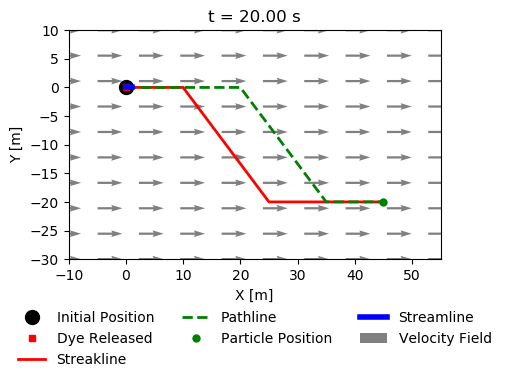

In [24]:
fig = plt.figure(dpi=fig_dpi) 

# set axis
ax = plt.axes(xlim=(np.amin([x_stream,x_path,x_streak])-buffer, np.amax([x_stream,x_path,x_streak])+buffer),
              ylim=(np.amin([y_stream,y_path,y_streak])-buffer, np.amax([y_stream,y_path,y_streak])+buffer),
              xlabel=('X [m]'), ylabel=('Y [m]'), aspect=('equal')) 

# create velocity field grid
x_vals = np.linspace(np.amin([x_stream,x_path,x_streak])-buffer,np.amax([x_stream,x_path,x_streak])+buffer,vel_n)
y_vals = np.linspace(np.amin([y_stream,y_path,y_streak])-buffer,np.amax([y_stream,y_path,y_streak])+buffer,vel_n)
X,Y= np.meshgrid(x_vals, y_vals, sparse=False, indexing='xy')

# initial position
plt.plot(x_o, y_o, color='black', linestyle='None', marker='o', markersize=marker_lg, 
         label='Initial Position')
# dye released
plt.plot(x_o, y_o, color='red', linestyle='None',marker='s', markersize=marker_sm, 
         label='Dye Released')
# streakline
line_streak, = ax.plot([], [], color='red', linestyle='-', linewidth=line_w, 
                     label='Streakline') 
# pathline
line_path, = ax.plot([], [], color='green', linestyle='--', linewidth=line_w, 
                     label='Pathline') 
# current position
current_point, = ax.plot([], [], color='green', linestyle='None',marker='o', markersize=marker_sm, 
                         label='Particle Position')
# streamline
line_stream, = ax.plot([], [], color='blue', linewidth=line_w*2, 
                       label='Streamline') 
# velocity field
vel_field = ax.quiver(X, Y, np.empty(X.size), np.empty(X.size), color=vel_c, scale=vel_s, pivot='mid', 
                      label='Velocity Field')
# legend outside of plot
box = ax.get_position()
ax.set_position([box.x0+box.width*0.2/2, box.y0+box.height*0.2, box.width*0.8, box.height*0.8])
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.17), ncol=3, edgecolor=l_e)

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line_streak.set_data([],[])
    line_stream.set_data([], [])  
    line_path.set_data([], []) 
    current_point.set_data([], [])
    vel_field.set_UVC(np.empty(X.size), np.empty(X.size))
    return line_streak,line_stream, line_path, current_point, vel_field 

# animation function 
def animate(k): 
    # streakline
    if k>0:
        # dye injection point
        x_s = np.multiply(x_o,np.ones(k+1,))
        y_s = np.multiply(y_o,np.ones(k+1,))
        for i in range(1,k+1):
            x_s[:i] = x_s[:i] + u_t[i-1]*del_t
            y_s[:i] = y_s[:i] + v_t[i-1]*del_t
    else:
        x_s=x_o; y_s=y_o
    line_streak.set_data(x_s, y_s) 
    # pathline 
    line_path.set_data(x_path[:k+1], y_path[:k+1]) 
    current_point.set_data(x_path[k],y_path[k])
    # streamline
    line_stream.set_data([x_o, x_stream[k]], [y_o, y_stream[k]]) 
    # velocity field
    U = np.multiply(u_t[k],np.ones(X.size))
    V = np.multiply(v_t[k],np.ones(X.size))
    vel_field.set_UVC(U,V)
    # title
    ax.set_title('t = {:.2f} s'.format(t[k]))
    return line_streak, line_stream, line_path, current_point, vel_field  

# call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=x_stream.size, interval=inter, blit=True) 
HTML(anim.to_jshtml())